## Práctica 2

In [5]:
import sklearn
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, _tree
from sklearn.tree import export_graphviz
import graphviz

In [6]:
df = pd.read_csv('./RecursosLab3/Setas/mushrooms.csv')

### Apartado A

#### Usaremos para clasificar el clasificador: arboles de decisión.

In [7]:
## Cargamos los datos y los dividimos en conjuntos de entrenamiento y prueba
X = df.iloc[:, 1:]
y = df.iloc[:, 0]

## Convertimos las variables categóricas en varibales númericas
le = LabelEncoder()
X_encoded = X.apply(le.fit_transform)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

In [8]:
## Creamos el clasificador de árboles de decisión con los criterios de división "gini" y "entropy":
clf = DecisionTreeClassifier(criterion='gini', max_depth=3)
clf2 = DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [9]:
clf.fit(X_train, y_train)
clf2.fit(X_train, y_train)

print("Precisión del clasificador con criterio de división 'gini': {:.3f}".format(clf.score(X_test, y_test)))
print("Precisión del clasificador con criterio de división 'entropy': {:.3f}".format(clf2.score(X_test, y_test)))


Precisión del clasificador con criterio de división 'gini': 0.958
Precisión del clasificador con criterio de división 'entropy': 0.953


#### A continuación, calculamos el error de cada uno de los criterios de división.

In [10]:
y_pred_gini = clf.predict(X_test)
y_pred_entropy = clf2.predict(X_test)

accuracy_gini = accuracy_score(y_test, y_pred_gini)
accuracy_entropy = accuracy_score(y_test, y_pred_entropy)

error_gini = 1 - accuracy_gini
error_entropy = 1 - accuracy_entropy

print("Error del clasificador con criterio de división 'gini': {:.3f}".format(error_gini))
print("Error del clasificador con criterio de división 'entropy': {:.3f}".format(error_entropy))

Error del clasificador con criterio de división 'gini': 0.042
Error del clasificador con criterio de división 'entropy': 0.047


##### Por tanto, tras crear un clasificador con los criterios de división "gini" y "entropy", podemos observar que el criterio de división "gini" tiene menor error que el criterio de división "entropy".
##### En este caso, vemos que el clasificador con criterio de división "gini" tiene un error ligeramente menor que el clasificador con criterio de división "entropy", lo que significa que el criterio de división "gini" es ligeramente más preciso en la clasificación de las setas.

### Apartado B

#### Dibujamos el modelo elegido en el apartado anterior. En este caso, el modelo "gini".

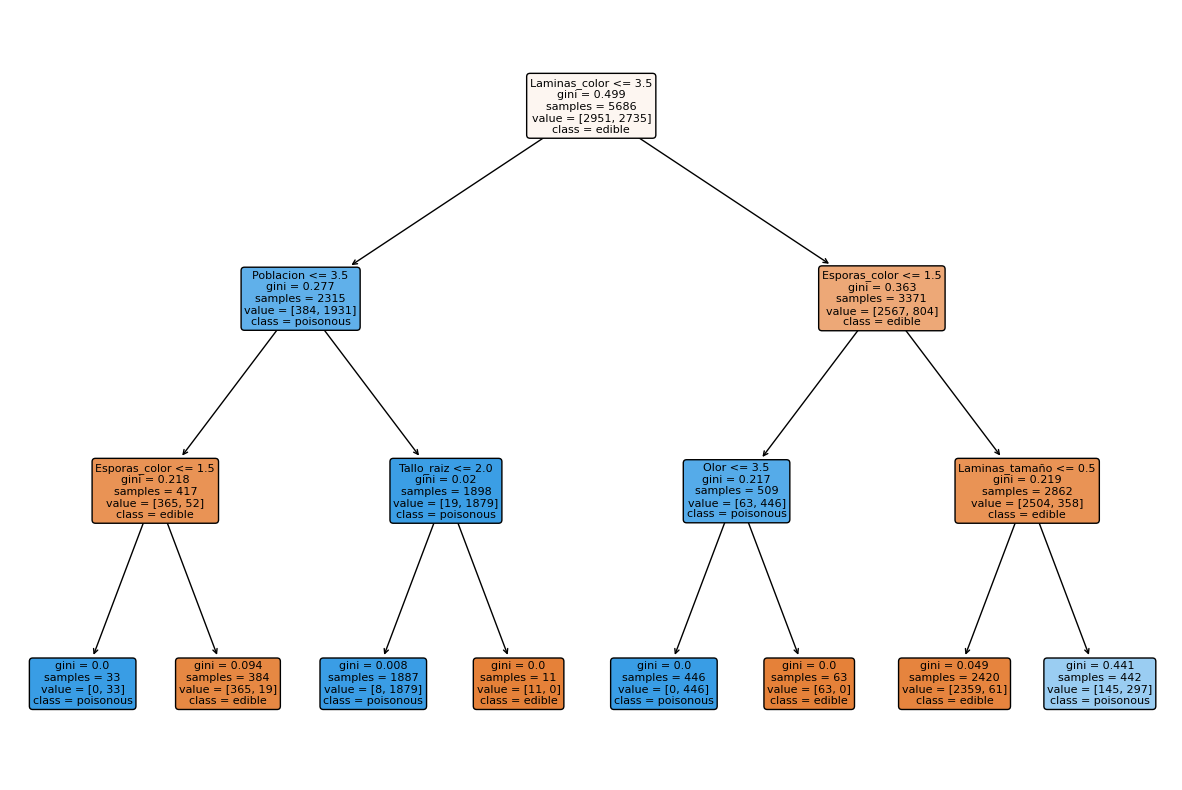

In [11]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
plot_tree(clf, filled=True, rounded=True, feature_names=X.columns, class_names=['edible', 'poisonous'])
plt.show()


### Apartado C

#### Selecciona tres reglas que sean las que generalicen lo menos posible e interprétalas.

In [12]:

# Recorrer el árbol y obtener las reglas
def get_rules(tree: _tree, feature_names: list):
    left = tree.children_left
    right = tree.children_right
    threshold = tree.threshold
    features = [feature_names[i] for i in tree.feature]

    # Recursivamente obtener las reglas para cada nodo
    def recurse(node: int, rule: str):
        if (threshold[node] != -2):
            cond = "{} <= {}".format(features[node], threshold[node])
            recurse(left[node], rule + " " + cond)
            recurse(right[node], rule + " " + "NOT " + cond)
        else:
            print(rule)

    recurse(0, "")

# Elaboramos todas las reglas. A partir de ahí seleccionamos las tres que generalicen lo menos posible.
get_rules(clf.tree_, X_train.columns)



 Laminas_color <= 3.5 Poblacion <= 3.5 Esporas_color <= 1.5
 Laminas_color <= 3.5 Poblacion <= 3.5 NOT Esporas_color <= 1.5
 Laminas_color <= 3.5 NOT Poblacion <= 3.5 Tallo_raiz <= 2.0
 Laminas_color <= 3.5 NOT Poblacion <= 3.5 NOT Tallo_raiz <= 2.0
 NOT Laminas_color <= 3.5 Esporas_color <= 1.5 Olor <= 3.5
 NOT Laminas_color <= 3.5 Esporas_color <= 1.5 NOT Olor <= 3.5
 NOT Laminas_color <= 3.5 NOT Esporas_color <= 1.5 Laminas_tamaño <= 0.5
 NOT Laminas_color <= 3.5 NOT Esporas_color <= 1.5 NOT Laminas_tamaño <= 0.5


In [13]:
# las tres reglas que generalizan lo menos posible son:

#### Regla 1: Si la población es menor o igual a 3.5 y el color de las esporas es menor o igual a 1.5, entonces es probable que la seta pertenezca a la clase con valor 1. Seta Comestible:

#### - Población <= 3.5 y Esporas_color <= 1.5

#### Regla 2: Si el color de las esporas es menor o igual a 1.5 y la relación entre el tallo y la raíz es mayor a 2.0, entonces es probable que la seta pertenezca a la clase con valor 1. Seta Comestible:

#### - Esporas_color <= 1.5 y Tallo_raiz > 2.0

#### Regla 3: Si el tamaño de las láminas es mayor a 0.5 y el color de las esporas es mayor a 1.5, entonces es probable que la seta pertenezca a la clase con valor 0. Seta Venenosa:

#### - Laminas_tamaño > 0.5 y Esporas_color > 1.5

### Apartado D

#### Usa tu clasificador para decidir si son venenos o no la “amanita muscaria” y la “amanita cesarea”

A continuación, vamos a usar el clasificador para decidir si son venenosas o no la “amanita muscaria” y la “amanita cesarea”.

En primer lugar, la "amanita muscaria" podemos ver que tiene una gran cantidad de esporas, un tallo fino y un conjunto de láminas de un tamaño superior a 0.5. Por tanto, al tener una gran cantidad de esporas y láminas de un tamaño mayor a 0.5, se cumple la regla 3.

De esta forma, podemos afirmar que la "amanita muscaria" es una seta venenosa.

Por otra parte, la “amanita cesarea” tiene un tallo bastante más grueso. Además, tiene muy pocas esporas en el "sombrero" de la seta.
Es decir, se cumple al regla número 2. De esta forma, podemos afirmar que la “amanita cesarea” es una seta comestible.


#### Amanita cesarea ---> Comestible.

#### Amanita muscaria ---> Venenosa.